In [103]:
import os 
import shutil

def move_files_with_more_than_60_lines(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        filepath = os.path.join(source_folder, filename)
       
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as file:  # Specify encoding
                line_count = sum(1 for line in file)
                if line_count > 60:
                    file.close()  # Close the file before moving
                    destination_filepath = os.path.join(destination_folder, filename)
                    shutil.move(filepath, destination_filepath)
                    print(f"Moved {filename} to {destination_folder}")


In [104]:

source_folder = './database/'
destination_folder = './clean_database/'

move_files_with_more_than_60_lines(source_folder, destination_folder)

In [105]:
def move_files_between_30_and_60_lines(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        filepath = os.path.join(source_folder, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as file:  # Specify encoding
                line_count = sum(1 for line in file)
                if line_count > 30 :
                    file.close()  # Close the file before moving
                    destination_filepath = os.path.join(destination_folder, filename)
                    shutil.move(filepath, destination_filepath)
                    print(f"Moved {filename} to {destination_folder}")
source_folder = './database/'
destination_folder = './predicted_database/'

move_files_between_30_and_60_lines(source_folder, destination_folder)                    

Moved dexscreener_12W2pRkm4bXg7EUS9zSoBXRCZWmb3CRPjUTAAit4hisv.csv to ./predicted_database/
Moved dexscreener_23dQY9fV8HtXnmGbqYNcbrZ3ej1kPrZAZAVLxzdUvLL8.csv to ./predicted_database/
Moved dexscreener_2AhC1v7Po9jqG52JpFgpE1XMrJVky1hGKfQYcigRFmrK.csv to ./predicted_database/
Moved dexscreener_2aq4YYPa67pKYh2omu7xBJyQz4K8U5HdMwZQHvVVGzo4.csv to ./predicted_database/
Moved dexscreener_2fPkiFPDHVzWdY5GnFoqssSnYGbCYJ2CwDs1J6N1ipKQ.csv to ./predicted_database/
Moved dexscreener_2H9RPHGRtaiEGFQ7rNPH5iyU1Yx1TWprKXKczHtQjYV4.csv to ./predicted_database/
Moved dexscreener_2i3prZK7aFS46uLyXYkXndaan5JRJM82VtzgwTWh7GZ7.csv to ./predicted_database/
Moved dexscreener_2JkPBgB5qCAja4c17ijKiWEzRS95TuHDw8sEBBYnGScm.csv to ./predicted_database/
Moved dexscreener_2MScgeA6hG7LRL3WxKpXBAQXsnK9FvJzUif24JVSobZd.csv to ./predicted_database/
Moved dexscreener_2RqzxCxDAEA6yoaGo3zaXaLimfErjeWe7WPfqpfoyWMR.csv to ./predicted_database/
Moved dexscreener_2TXx2gaqyDbCQCoUt4Ckk6m7eUdH2yJo7FpXutCBxZGD.csv to ./predicte

In [86]:
"""
Now we will count how many files make a x4 after 1hour 
"""
import pandas as pd 

yes=[]
no=[]

for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        
        price_at_one_hour_left = dataframe.iloc[29]["token_price_usd"] 
        
        for index in range(30, len(dataframe)):
            price_after_one_hour = dataframe.iloc[index]["token_price_usd"]
            if((price_at_one_hour_left/price_after_one_hour)>=5):
                  yes.append(dataframe.iloc[index]["token_address"])
                  did_it=True
                  break
        if(did_it==False):
              no.append(dataframe.iloc[29]["token_address"])   

print("number of token did a x3",len(yes))
print("number of token didn't a x3",len(no))




number of token did a x3 25
number of token didn't a x3 273


C:\Users\YounèsAITKETTOUT\AppData\Local\Temp\ipykernel_11728\1816326215.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


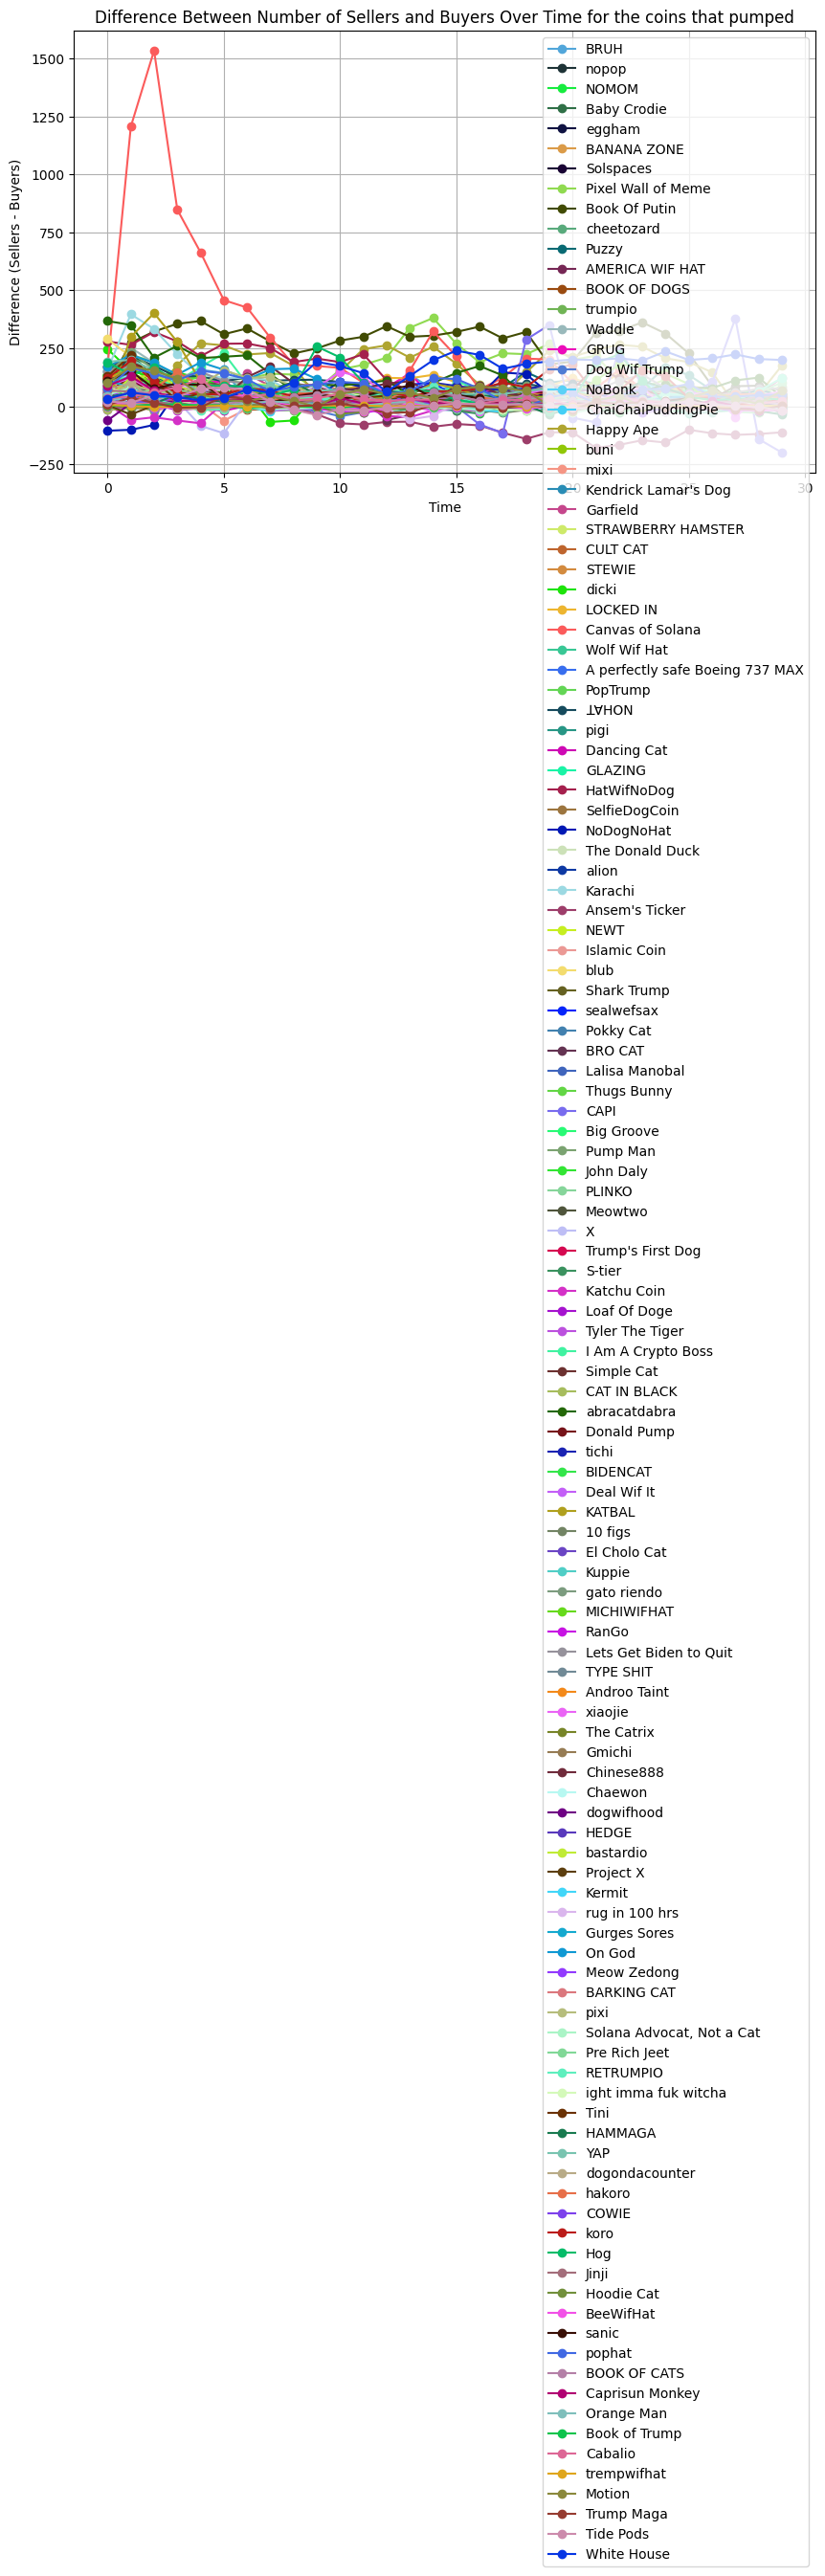

In [60]:
"""
plot in this graph the difference between buyers and sellers on 5minutes for the token that did a x3
"""
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 6))
timestamps = list(range(30))
for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        token_adress= dataframe.iloc[29]["token_address"] 
        difference=[]
        if(token_adress in yes):
            token_name=dataframe.iloc[29]["token_name"] 
            for index in range(0, 30):
                difference.append(dataframe.iloc[index]["token_m5_buys"]-dataframe.iloc[index]["token_m5_sells"])

            color=(random.random(), random.random(), random.random())
            plt.plot(timestamps, difference, marker='o', linestyle='-', color=color, label=token_name)
plt.xlabel('Time')
plt.ylabel('Difference (Sellers - Buyers)')
plt.title('Difference Between Number of Sellers and Buyers Over Time for the coins that pumped')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()                

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


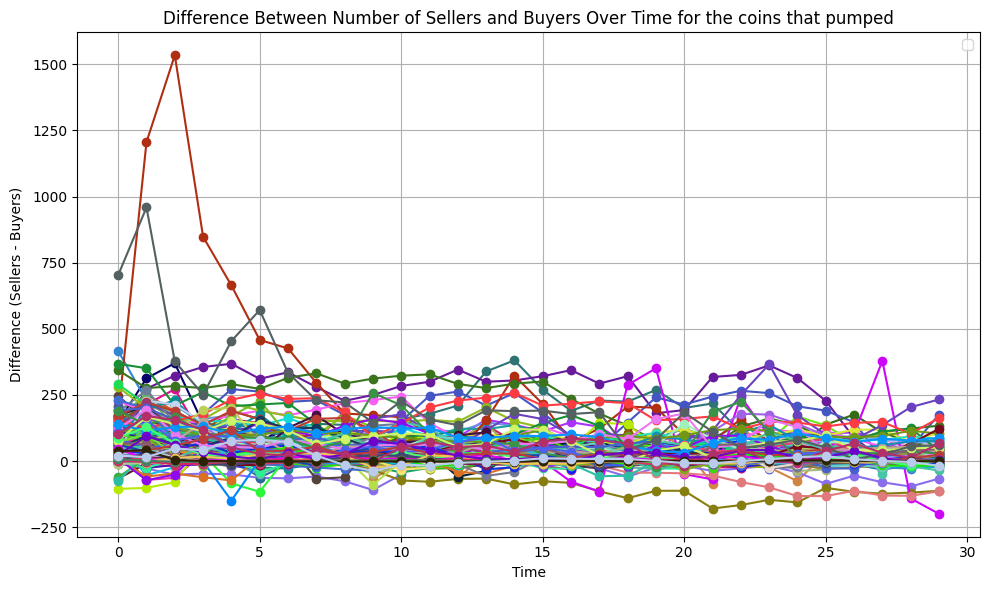

In [52]:
"""
plot in this graph the difference between buyers and sellers on 5minutes for the token that didn't a x3
"""
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 6))
timestamps = list(range(30))
for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        token_adress= dataframe.iloc[29]["token_address"] 
        difference=[]
        if(token_adress in no):
            token_name=dataframe.iloc[29]["token_name"] 
            for index in range(0, 30):
                difference.append(dataframe.iloc[index]["token_m5_buys"]-dataframe.iloc[index]["token_m5_sells"])

            color=(random.random(), random.random(), random.random())
            plt.plot(timestamps, difference, marker='o', linestyle='-', color=color)
plt.xlabel('Time')
plt.ylabel('Difference (Sellers - Buyers)')
plt.title('Difference Between Number of Sellers and Buyers Over Time for the coins that pumped')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()    

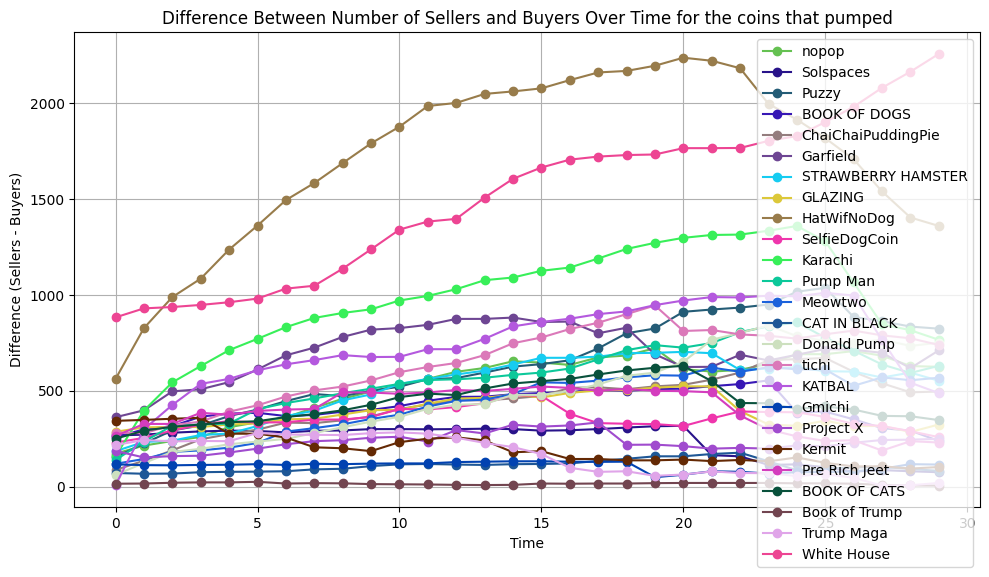

In [53]:
"""
plot in this graph the difference between buyers and sellers on 1hour for the token that didn't a x3
"""
plt.figure(figsize=(10, 6))
timestamps = list(range(30))
for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        token_adress= dataframe.iloc[29]["token_address"] 
        difference=[]
        if(token_adress in yes):
            token_name=dataframe.iloc[29]["token_name"] 
            for index in range(0, 30):
                difference.append(dataframe.iloc[index]["token_h1_buys"]-dataframe.iloc[index]["token_h1_sells"])

            color=(random.random(), random.random(), random.random())
            plt.plot(timestamps, difference, marker='o', linestyle='-', color=color, label=token_name)
plt.xlabel('Time')
plt.ylabel('Difference (Sellers - Buyers)')
plt.title('Difference Between Number of Sellers and Buyers Over Time for the coins that pumped')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


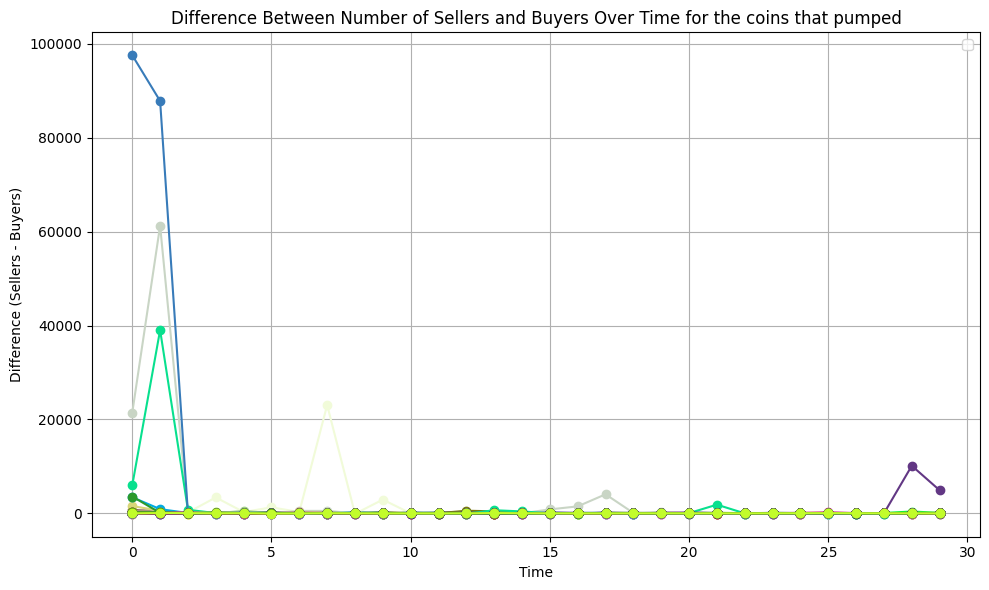

In [56]:
"""
plot in this graph the difference between buyers and sellers on 1hour for the token that didn't a x3
"""
plt.figure(figsize=(10, 6))
timestamps = list(range(30))
for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        token_adress= dataframe.iloc[29]["token_address"] 
        difference=[]
        if(token_adress in no):
            token_name=dataframe.iloc[29]["token_name"] 
            for index in range(0, 30):
                difference.append(dataframe.iloc[index]["token_h1_buys"]-dataframe.iloc[index]["token_h1_sells"])

            color=(random.random(), random.random(), random.random())
            plt.plot(timestamps, difference, marker='o', linestyle='-', color=color)
plt.xlabel('Time')
plt.ylabel('Difference (Sellers - Buyers)')
plt.title('Difference Between Number of Sellers and Buyers Over Time for the coins that pumped')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()  

In [87]:
X=[]
Y=[]
for filename in os.listdir("./clean_database"):
        did_it=False
        filepath = os.path.join("./clean_database", filename)
        dataframe=pd.read_csv(filepath,sep="\t") 
        sample= []
        token_adress= dataframe.iloc[29]["token_address"]

        for index in range(0, 30):
                sample.append([dataframe.iloc[index]["token_m5_buys"],dataframe.iloc[index]["token_m5_sells"],dataframe.iloc[index]["token_m5_buys"]-dataframe.iloc[index]["token_m5_sells"],dataframe.iloc[index]["token_h1_buys"],dataframe.iloc[index]["token_h1_sells"],dataframe.iloc[index]["token_h1_buys"]-dataframe.iloc[index]["token_h1_sells"],dataframe.iloc[index]["token_h1_to_m5_buys"],dataframe.iloc[index]["token_market_cap"],dataframe.iloc[index]["token_price_change_m5"]])
        X.append(sample)
        if(token_adress in yes):
                Y.append(1)
        else : 
                Y.append(0)                

In [114]:
from sklearn.model_selection import train_test_split

# Assuming X_seqs is your sequence data and y_labels is the corresponding labels
# X_seqs is a list of sequences
# y_labels is a list of corresponding labels (1 for positive, 0 for negative)

# Split the data into training and test sets with stratified sampling
X_train_seqs, X_test_seqs, y_train_labels, y_test_labels = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Print the class distribution in the training and test sets
print("Training set class distribution:")
print("Label 1:", sum(y_train_labels), ", Label 0:", len(y_train_labels) - sum(y_train_labels))
print("Test set class distribution:")
print("Label 1:", sum(y_test_labels), ", Label 0:", len(y_test_labels) - sum(y_test_labels))



Training set class distribution:
Label 1: 20 , Label 0: 218
Test set class distribution:
Label 1: 5 , Label 0: 55


In [118]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Convert X to a numpy array
X_arr = np.array(X)

# Convert y to a numpy array
y_arr = np.array(Y)

# Define model architecture for binary classification
model = Sequential()
model.add(LSTM(100,activation="tanh", input_shape=(30,9), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,acitvation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid activation for binary classification

# Compile the model
model.compile( loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy loss for binary classification

# Train the model
history = model.fit(X_arr, y_arr, epochs=40, batch_size=32)

Epoch 1/40
10/10 [==============================] - 11s 59ms/step - loss: nan - accuracy: 0.8960
Epoch 2/40
10/10 [==============================] - 1s 65ms/step - loss: nan - accuracy: 0.9161
Epoch 3/40
10/10 [==============================] - 1s 66ms/step - loss: nan - accuracy: 0.9161
Epoch 4/40
10/10 [==============================] - 1s 67ms/step - loss: nan - accuracy: 0.9161
Epoch 5/40
10/10 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.9161
Epoch 6/40
10/10 [==============================] - 1s 55ms/step - loss: nan - accuracy: 0.9161
Epoch 7/40
10/10 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.9161
Epoch 8/40
10/10 [==============================] - 1s 71ms/step - loss: nan - accuracy: 0.9161
Epoch 9/40
10/10 [==============================] - 1s 50ms/step - loss: nan - accuracy: 0.9161
Epoch 10/40
10/10 [==============================] - 1s 54ms/step - loss: nan - accuracy: 0.9161
Epoch 11/40
10/10 [===================

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_arr = np.array(X_test_seqs)
predictions = model.predict(X_arr)

# If your model outputs probabilities (e.g., if using sigmoid activation in the last layer), 
# you might need to threshold them to get binary predictions
y_arr=y_test_labels
print(y_test_labels)
print(predictions)
# Calculate metrics
accuracy = accuracy_score(y_arr, predictions)
precision = precision_score(y_arr, predictions)
recall = recall_score(y_arr, predictions)
f1 = f1_score(y_arr, predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Assuming you have true labels (y_test) and predictions (binary_predictions) ready
report = classification_report(y_arr, predictions, target_names=['Class 0', 'Class 1'])

print("\n")
print(report)

2/2 [==============================] - 0s 14ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


c:\Users\YounèsAITKETTOUT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.